In [276]:
# Import necessary libraries
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [324]:
# create key to access YouTube Data
api_key =  #'HIDDEN'
#channel_id = 'HIDDEN'  # Bethel Music

channel_ids = #['HIDDEN', # Bethel Music
              # 'HIDDEN', #Hillsong United
               #'HIDDEN', #RedRocks Worship
               #'HIDDEN', #Maverick City
               #'HIDDEN'  #Jesus Culteure
              ]

youtube = build('youtube', 'v3', developerKey=api_key)

# Function to get channel statistics

In [325]:
def get_channel_stats(youtube, channel_ids):
    all_data = []
    
    requests = youtube.channels().list(
                 part='snippet,contentDetails,statistics',
                 id=','.join(channel_ids))
    response = requests.execute()
    
    
    for i in range (len(response['items'])):
          data = dict(Channel_name = response['items'][i]['snippet']['title'],
               Subscribers =  response['items'][i]['statistics']['subscriberCount'],
               Views = response['items'][i]['statistics']['viewCount'],
               Total_Videos = response['items'][i]['statistics']['videoCount'],
               Playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
          all_data.append(data)
    return all_data

In [326]:
channel_statistics = get_channel_stats(youtube, channel_ids)

In [327]:
channel_data = pd.DataFrame(channel_statistics)

In [328]:
channel_data

,Channel_name,Subscribers,Views,Total_Videos,Playlist_id
0,Maverick City Music - Topic,169000,26902360,193,UUcQaSpIMPptu9RLgqIbviqw
1,Bethel Music,4110000,2103949746,1348,UUbertc-gMbkkHuSmg0qwnxw
2,Jesus Culture,1140000,389276173,797,UUlY2pCQLyy9s678tf4dqWLQ
3,Red Rocks Worship,164000,55739546,140,UUyCcknSQSxyZw9TkCrQLNEg
4,Hillsong UNITED,4270000,1331022233,463,UUsOoQeBWPnfWBYAwmO795zg


In [329]:
channel_data.dtypes

Channel_name    object
Subscribers     object
Views           object
Total_Videos    object
Playlist_id     object
dtype: object

In [330]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_Videos'] = pd.to_numeric(channel_data['Total_Videos'])
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_Videos     int64
Playlist_id     object
dtype: object

## TOTAL SUBSCRIBERS PER CHANNEL

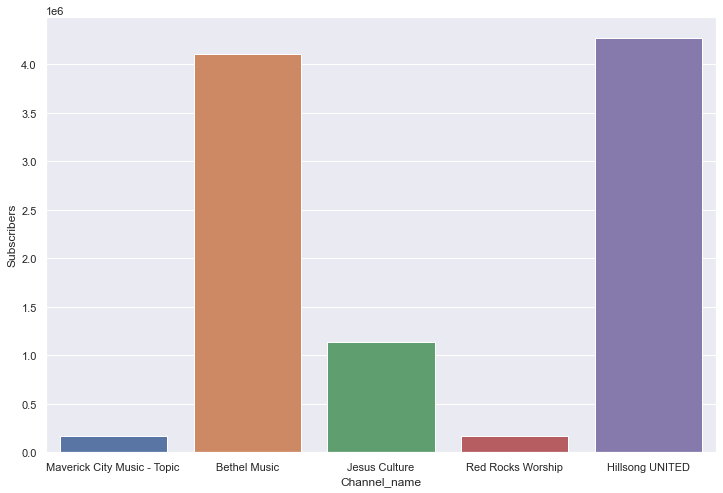

In [331]:
sns.set(rc={'figure.figsize':(12,8)})
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)

## TOTAL VIEWS PER CHANNEL

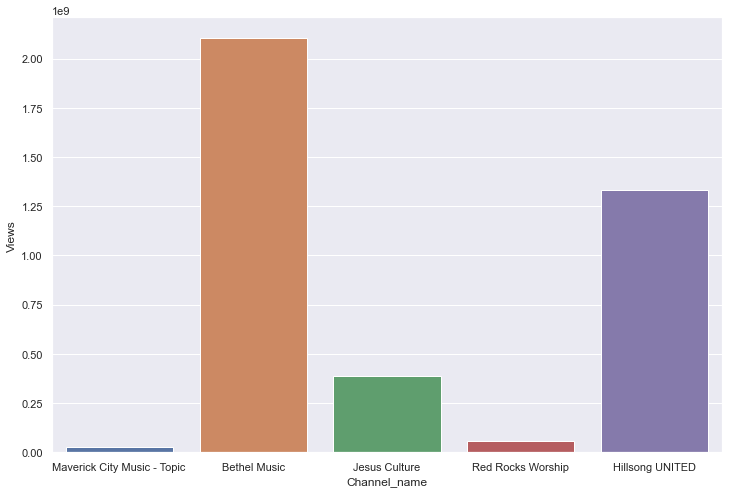

In [332]:
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data)

## TOTAL VIDEOS PER CHANNEL

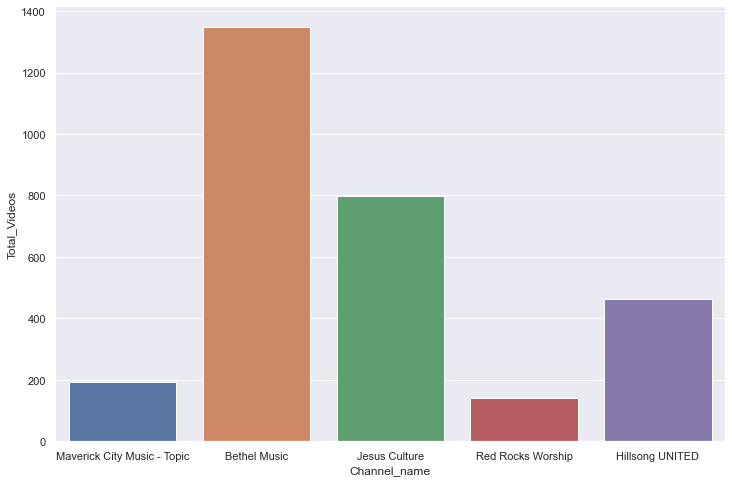

In [333]:
ax = sns.barplot(x='Channel_name', y='Total_Videos', data=channel_data)

## FUNCTION TO GET VIDEO IDS

In [334]:
channel_data

,Channel_name,Subscribers,Views,Total_Videos,Playlist_id
0,Maverick City Music - Topic,169000,26902360,193,UUcQaSpIMPptu9RLgqIbviqw
1,Bethel Music,4110000,2103949746,1348,UUbertc-gMbkkHuSmg0qwnxw
2,Jesus Culture,1140000,389276173,797,UUlY2pCQLyy9s678tf4dqWLQ
3,Red Rocks Worship,164000,55739546,140,UUyCcknSQSxyZw9TkCrQLNEg
4,Hillsong UNITED,4270000,1331022233,463,UUsOoQeBWPnfWBYAwmO795zg


In [335]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Bethel Music', 'Playlist_id'].iloc[0]

In [336]:
playlist_id

'UUbertc-gMbkkHuSmg0qwnxw'

In [337]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
                 part='contentDetails',
                playlistId=playlist_id,
                maxResults=50)
    response = request.execute()
    video_ids = []
    
    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    next_page_token = response.get('nextPageToken')
    more_pages = True
    
    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                        part='contentDetails',
                        playlistId=playlist_id,
                        maxResults=50,
                        pageToken = next_page_token)
            response = request.execute()
            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])
            next_page_token = response.get('nextPageToken')
    return video_ids

In [ ]:
get_video_ids(youtube, playlist_id)

In [ ]:
video_ids

## FUNCTION TO GET VIDEO DETAILS

In [345]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
                     part='snippet, statistics',
                     id=','.join(video_ids[i:i+50]))
        response = request.execute()
     
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_Date=video['snippet']['publishedAt'],
                               Views=video['statistics']['viewCount'],
                               Favourite=video['statistics']['favoriteCount'])
#                               Comment=video['statistics']['commentCount'])
            all_video_stats.append(video_stats)
    return all_video_stats

In [346]:
video_details = get_video_details(youtube, video_ids)

In [347]:
video_data = pd.DataFrame(video_details)
video_data

,Title,Published_Date,Views,Favourite
0,Sound Mind - Melissa Helser | Moment,2022-05-24T20:24:45Z,0,0
1,Build Your Church - Naomi Raine | Moment,2022-05-06T13:00:13Z,67812,0
2,Homecoming | The Live Recording,2022-04-29T01:00:09Z,506175,0
3,With Everything - Bethany Wohrle | Moment,2022-04-21T16:07:06Z,108738,0
4,About The Album The Field - Kristene DiMarco,2022-04-14T13:00:19Z,16549,0
...,...,...,...,...
1343,"How to play ""One Thing Remains""",2012-02-03T00:47:57Z,50942,0
1344,"How to play ""One Thing Remains"" (The Loft Sess...",2012-02-03T00:43:02Z,65808,0
1345,The Loft Sessions (Behind the Scenes),2012-01-25T21:56:52Z,88838,0
1346,Bethel Live Rehearsals,2012-01-10T06:45:45Z,12198,0


In [348]:
video_data['Published_Date'] = pd.to_datetime(video_data['Published_Date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data

,Title,Published_Date,Views,Favourite
0,Sound Mind - Melissa Helser | Moment,2022-05-24,0,0
1,Build Your Church - Naomi Raine | Moment,2022-05-06,67812,0
2,Homecoming | The Live Recording,2022-04-29,506175,0
3,With Everything - Bethany Wohrle | Moment,2022-04-21,108738,0
4,About The Album The Field - Kristene DiMarco,2022-04-14,16549,0
...,...,...,...,...
1343,"How to play ""One Thing Remains""",2012-02-03,50942,0
1344,"How to play ""One Thing Remains"" (The Loft Sess...",2012-02-03,65808,0
1345,The Loft Sessions (Behind the Scenes),2012-01-25,88838,0
1346,Bethel Live Rehearsals,2012-01-10,12198,0


In [349]:
Top_10_videos = video_data.sort_values(by='Views', ascending=False).head(10)

Top_10_videos

,Title,Published_Date,Views,Favourite
666,Reckless Love (Official Lyric Video),2018-01-20,155084192,0
1127,No Longer Slaves (Official Lyric Video) - Jona...,2015-01-26,145482430,0
372,Way Maker - Paul McClure | Moment,2019-09-23,101922721,0
1227,It Is Well - Kristene DiMarco | You Make Me Brave,2014-04-28,88154672,0
696,Reckless Love (Live with story) - Cory Asbury ...,2017-11-23,67303854,0
453,Goodness Of God (LIVE) - Jenn Johnson | VICTORY,2019-01-04,61652714,0
816,You're Gonna Be Okay (Lyric Video) - Brian & J...,2017-01-27,44420254,0
454,Raise A Hallelujah (LIVE) - Jonathan and Melis...,2019-01-03,44230887,0
450,Raise A Hallelujah (Official Lyric Video) - Be...,2019-01-24,36630751,0
345,Touch of Heaven - David Funk | Worship Night,2019-11-12,33083814,0


## TOP 10 VIDEOS(BETHEL)

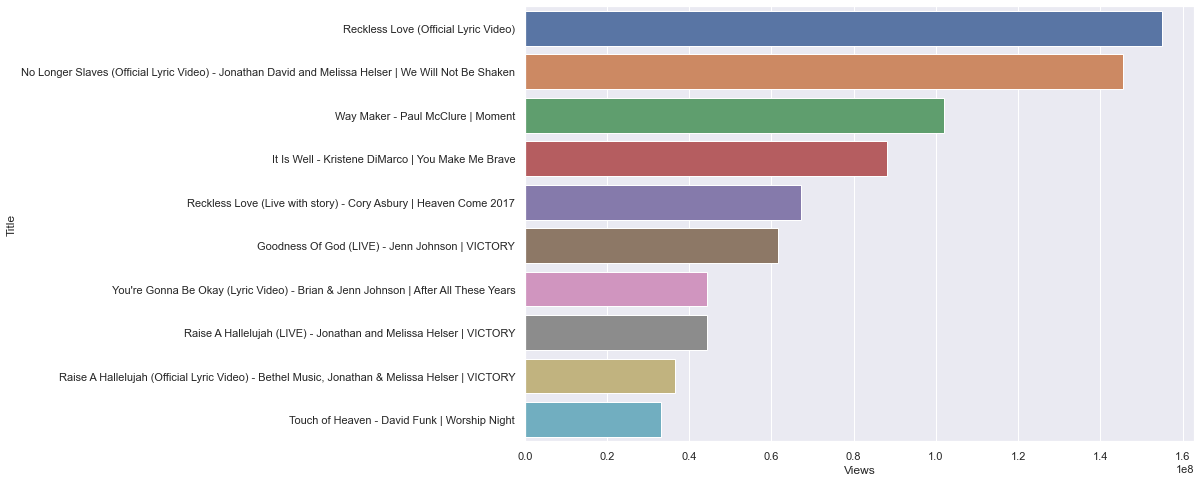

In [350]:
ax1 = sns.barplot(x = 'Views', y = 'Title', data = Top_10_videos)

In [351]:
video_data['Month'] = pd.to_datetime(video_data['Published_Date']).dt.strftime('%b')

In [352]:
video_data

,Title,Published_Date,Views,Favourite,Month
0,Sound Mind - Melissa Helser | Moment,2022-05-24,0,0,May
1,Build Your Church - Naomi Raine | Moment,2022-05-06,67812,0,May
2,Homecoming | The Live Recording,2022-04-29,506175,0,Apr
3,With Everything - Bethany Wohrle | Moment,2022-04-21,108738,0,Apr
4,About The Album The Field - Kristene DiMarco,2022-04-14,16549,0,Apr
...,...,...,...,...,...
1343,"How to play ""One Thing Remains""",2012-02-03,50942,0,Feb
1344,"How to play ""One Thing Remains"" (The Loft Sess...",2012-02-03,65808,0,Feb
1345,The Loft Sessions (Behind the Scenes),2012-01-25,88838,0,Jan
1346,Bethel Live Rehearsals,2012-01-10,12198,0,Jan


In [353]:
videos_per_month = video_data.groupby(video_data['Month'], as_index=False).size()

In [354]:
videos_per_month

,Month,size
0,Apr,146
1,Aug,80
2,Dec,89
3,Feb,82
4,Jan,133
5,Jul,95
6,Jun,70
7,Mar,133
8,May,91
9,Nov,157


In [355]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'
               'Sep', 'Oct', 'Nov', 'Dec']

In [356]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories = sort_order,  ordered = True)

In [357]:
videos_per_month = videos_per_month.sort_index()

## TOTAL VIDEOS PER MONTH(BETHEL)

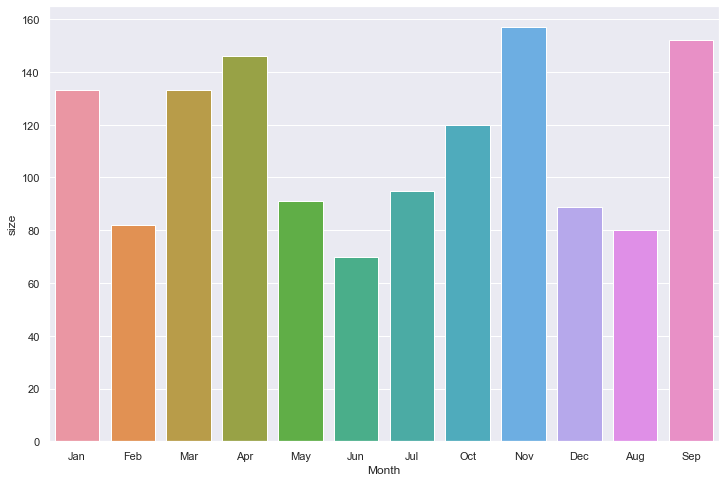

In [358]:
ax2 = sns.barplot(x='Month', y='size', data=videos_per_month)